<a href="https://colab.research.google.com/github/Reyhaneh2001/Dimensionality-Reduction-Comparison/blob/main/Dimensionality_Reduction_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA, TruncatedSVD, KernelPCA
from sklearn.manifold import TSNE, Isomap, MDS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

In [2]:
sns.set(style="whitegrid", context="notebook")
digits = load_digits()
X = digits.data
y = digits.target

# Standardize Features
X_std = StandardScaler().fit_transform(X)

# **Plotting function**

In [3]:
def plot_2D(X_reduced, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='tab10', s=15, alpha=0.8)
    plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.tight_layout()
    plt.show()

##  **1. Principal Component Analysis (PCA)**

**Principal Component Analysis (PCA)** is a **linear dimensionality reduction** technique that projects the data onto a lower-dimensional space while **maximizing the variance**. It identifies the directions (called principal components) along which the data varies the most and uses those to represent the data in fewer dimensions.

-  **Type**: Linear, Unsupervised  
-  **Goal**: Maximize variance in fewer dimensions  
-  **Applications**: Data compression, visualization, noise reduction  
-  **Mathematical Basis**: Eigen decomposition of the covariance matrix

PCA is especially effective when the data lies along linear subspaces and when interpretability of components is important.


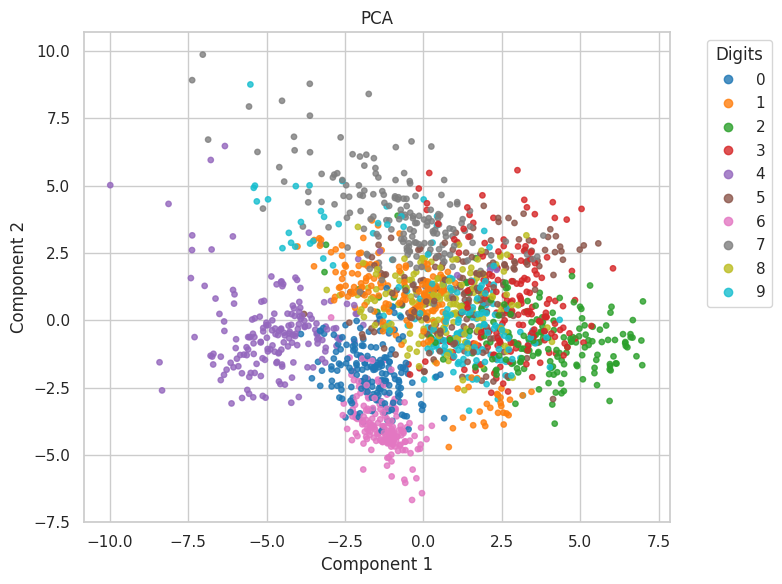

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
plot_2D(X_pca, "PCA")

##  **2. t-Distributed Stochastic Neighbor Embedding (t-SNE)**

**t-SNE** is a **nonlinear dimensionality reduction** technique designed primarily for **visualizing high-dimensional data** in 2 or 3 dimensions. It focuses on preserving **local structure** by converting pairwise similarities into probabilities and minimizing the divergence between these in high and low dimensions.

-  **Type**: Nonlinear, Unsupervised  
-  **Goal**: Preserve local neighborhood structure  
-  **Best For**: Visualization of complex datasets (e.g., images, text embeddings)  
-  **Note**: Not ideal for general-purpose reduction or downstream tasks due to high computational cost and lack of global structure

t-SNE often creates visually meaningful clusters, but the distances between clusters may not be informative.


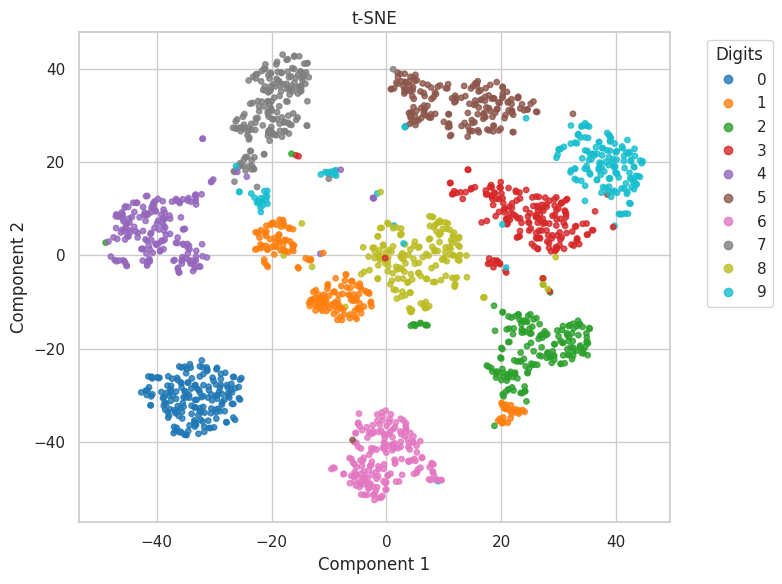

In [5]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_std)
plot_2D(X_tsne, "t-SNE")

##  **3. Uniform Manifold Approximation and Projection (UMAP)**

**UMAP** is a **nonlinear dimensionality reduction** technique that models data as a high-dimensional graph and optimizes a low-dimensional projection that preserves both **local and global structure**. It is often faster than t-SNE and scales better to large datasets.

-  **Type**: Nonlinear, Unsupervised  
-  **Goal**: Preserve both local neighborhoods and broader data topology  
-  **Advantages**: Fast, scalable, captures global relationships better than t-SNE  
-  **Based On**: Manifold learning and topological data analysis

UMAP is highly effective for visualization and can also be used for preprocessing in machine learning pipelines.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


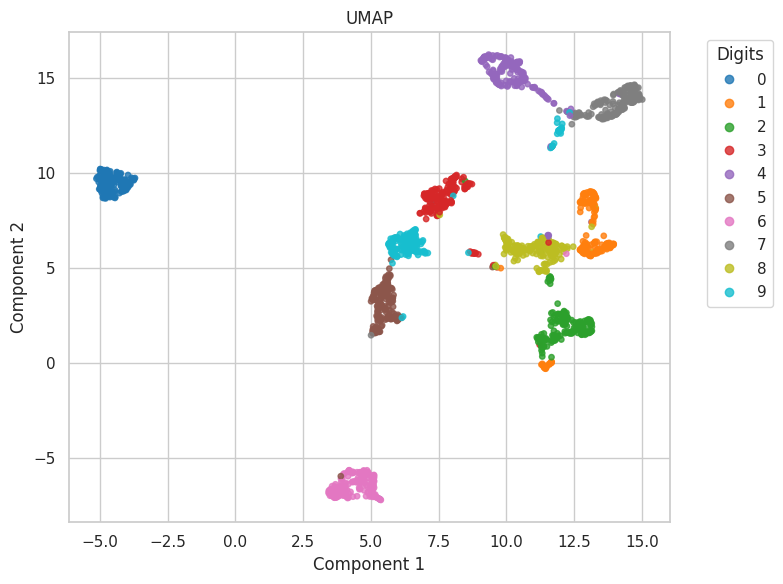

In [6]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_std)
plot_2D(X_umap, "UMAP")

##  **4. Linear Discriminant Analysis (LDA)**

**Linear Discriminant Analysis (LDA)** is a **supervised dimensionality reduction** method that finds a linear combination of features which best separates two or more classes. Unlike PCA, LDA considers **class labels** to maximize **class separability**.

-  **Type**: Linear, Supervised  
-  **Goal**: Maximize between-class variance while minimizing within-class variance  
-  **Best For**: Classification tasks with labeled data  
-  **Output Dimensionality**: At most *(number of classes - 1)*

LDA is useful when you want to reduce dimensions **while preserving class-discriminative information**.


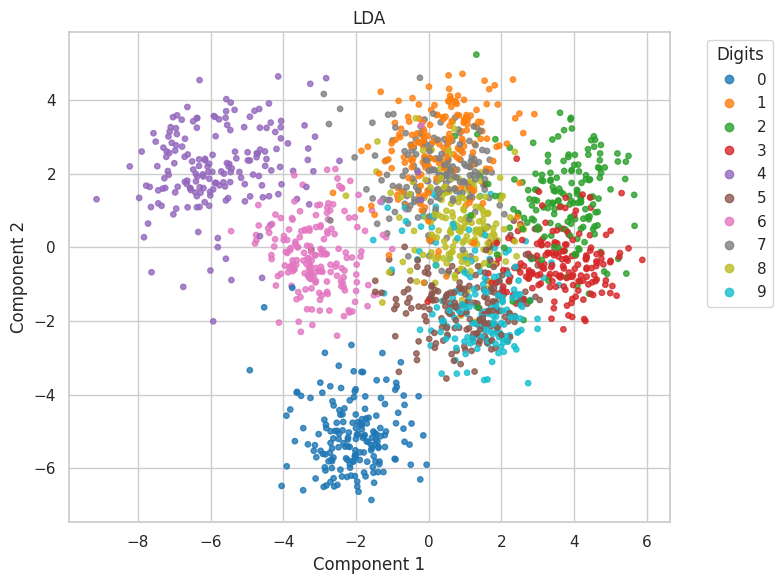

In [7]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_std, y)
plot_2D(X_lda, "LDA")

##  **5. Isomap (Isometric Mapping)**

**Isomap** is a **nonlinear dimensionality reduction** technique that extends Multidimensional Scaling (MDS) by preserving **geodesic distances** (shortest path along a manifold) rather than straight-line Euclidean distances. It’s well-suited for data that lies on a curved, lower-dimensional surface.

-  **Type**: Nonlinear, Unsupervised  
-  **Goal**: Preserve global geometric structure via geodesic distances  
-  **Core Idea**: Constructs a neighborhood graph and estimates distances using shortest paths  
-  **Best For**: Manifold learning on complex, curved datasets

Isomap captures **both local and global structure** better than purely local methods, but can be sensitive to noise and neighborhood size.


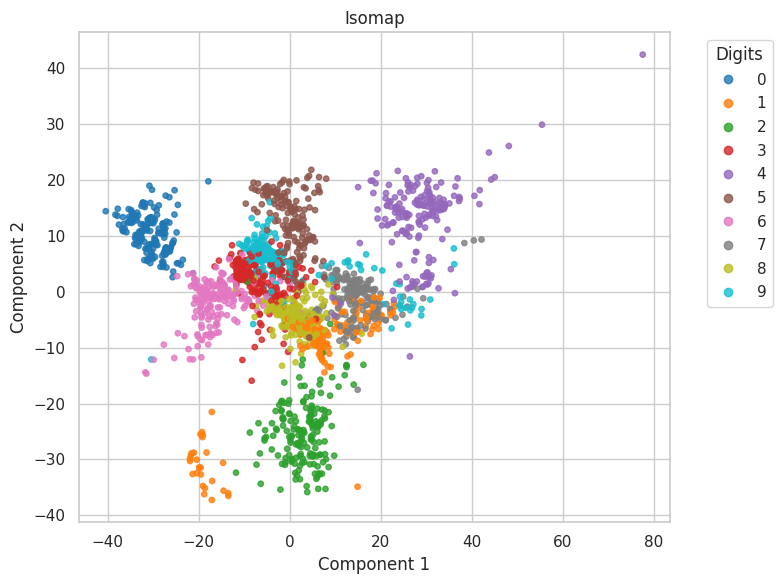

In [8]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_std)
plot_2D(X_isomap, "Isomap")

##  **6. Multidimensional Scaling (MDS)**

**Multidimensional Scaling (MDS)** is a **distance-preserving dimensionality reduction** technique that attempts to maintain the **pairwise distances** between all points in the dataset when projecting to lower dimensions. It’s useful for understanding the relative relationships between points.

-  **Type**: Linear or Nonlinear (depending on distance metric), Unsupervised  
-  **Goal**: Preserve pairwise distances between points  
-  **Input**: Distance (dissimilarity) matrix or raw data  
-  **Variants**: Classical MDS (metric), Non-metric MDS (rank order preservation)

MDS is intuitive and effective for small datasets, but **computationally intensive** for large ones and doesn’t scale as well as newer methods like UMAP or t-SNE.



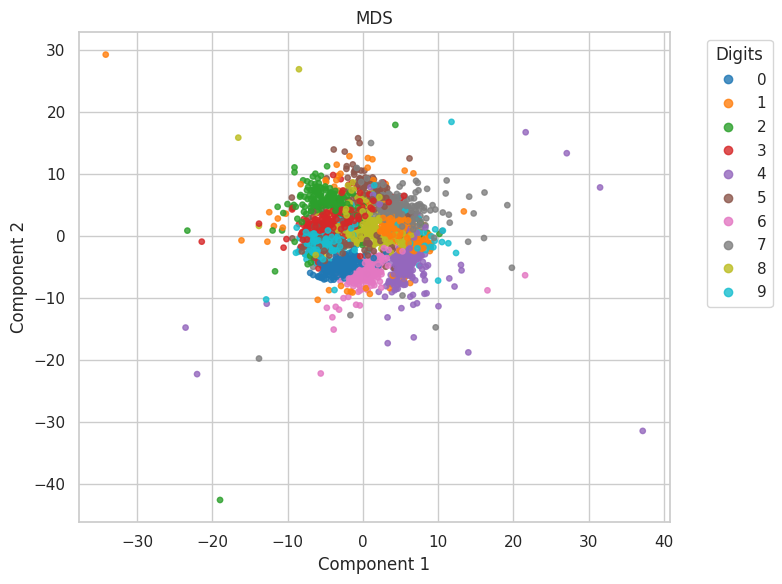

In [9]:
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_std)
plot_2D(X_mds, "MDS")

##  **7. Kernel Principal Component Analysis (Kernel PCA)**

**Kernel PCA** extends traditional PCA by applying the **kernel trick** to project data into a higher-dimensional feature space where linear separation becomes possible, and then performing PCA in that space. It enables **nonlinear dimensionality reduction** while retaining the mathematical framework of PCA.

-  **Type**: Nonlinear, Unsupervised  
-  **Goal**: Capture nonlinear structures by using kernel functions (e.g., RBF, polynomial)  
-  **Technique**: Applies PCA on a kernel-transformed similarity matrix  
-  **Key Strength**: Preserves variance in complex, nonlinear manifolds

Kernel PCA is powerful for datasets where linear PCA fails, but **kernel choice** and **parameter tuning** are critical to its success.


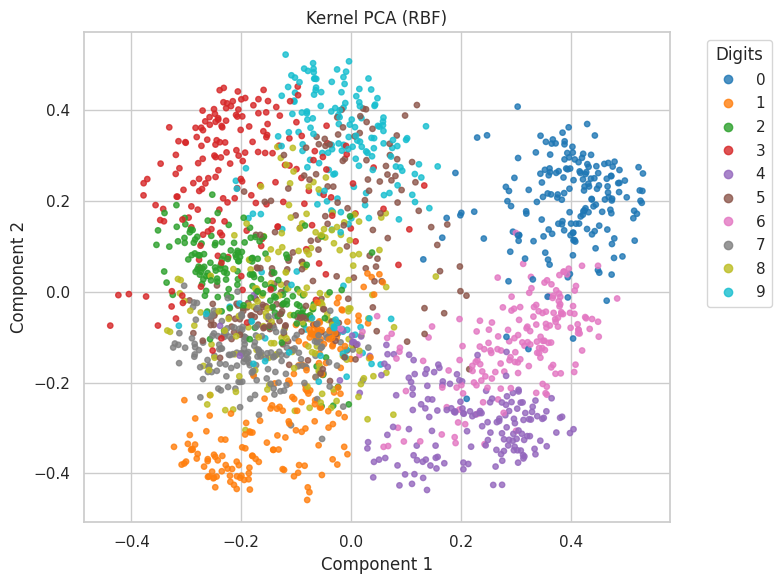

In [10]:
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)
plot_2D(X_kpca, "Kernel PCA (RBF)")

##  **8. Truncated Singular Value Decomposition (Truncated SVD / LSA)**

**Truncated SVD** is a **linear dimensionality reduction** technique that decomposes a matrix into its singular vectors and values, retaining only the top components. It's particularly effective on **sparse and high-dimensional data**, such as document-term matrices in NLP.

-  **Type**: Linear, Unsupervised  
-  **Goal**: Retain most important components (largest singular values)  
-  **Best For**: Sparse matrices, text data (LSA), scalable to large datasets  
-  **Difference from PCA**: Works directly on sparse matrices without centering

Truncated SVD is widely used in **Latent Semantic Analysis (LSA)** to uncover hidden semantic structure in large text corpora.


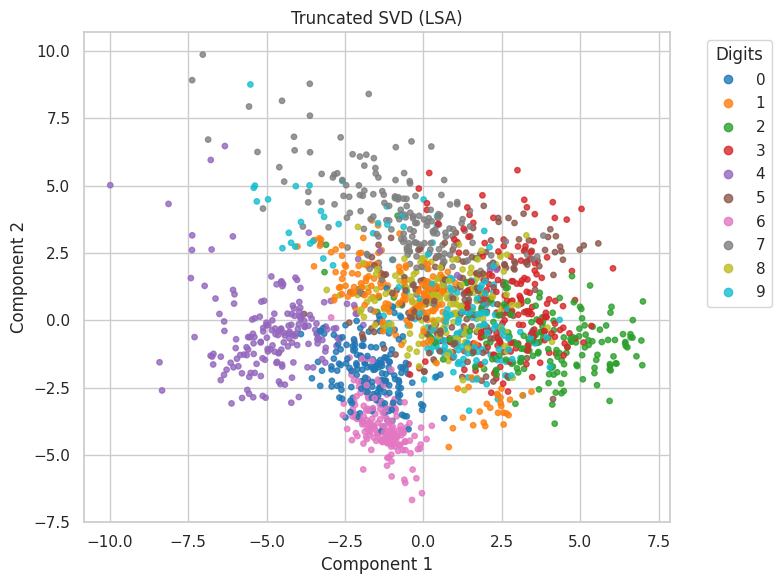

In [11]:
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_std)
plot_2D(X_svd, "Truncated SVD (LSA)")